## Setup

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## EXERCISE 8. Net revenue


| product_id | name           | wholesale_price | retail_price | sales |
|------------|----------------|-----------------|--------------|-------|
| 23         | computer       | 500.0           | 1000         | 100   |
| 96         | Python Workout | 35.0            | 75           | 1000  |
| 97         | Pandas Workout | 35.0            | 75           | 500   |
| 15         | banana         | 0.5             | 1            | 200   |
| 87         | sandwich       | 3.0             | 5            | 300   |


In [ ]:
# Create a dataframe with product information from the table above
df = pd.DataFrame({
    'product_id': [23, 96, 97, 15, 87],
    'name': ['computer', 'Python Workout', 'Pandas Workout', 'banana', 'sandwich'],
    'wholesale_price': [500.0, 35.0, 35.0, 0.5, 3.0],
    'retail_price': [1000, 75, 75, 1, 5],
    'sales': [100, 1000, 500, 200, 300]
})

In [10]:
# Create a new column for the net revenue from each product
df['net_revenue'] = (df['retail_price'] - df['wholesale_price']) * df['sales']

# Calculate the total net revenue from all your products
df['net_revenue'].sum()

np.float64(110700.0)

In [10]:
# For what products is the retail price more than twice the wholesale price?
df[df['retail_price'] > 2 * df['wholesale_price']]

,product_id,name,wholesale_price,retail_price,sales,revenue
1,96,Python Workout,35.0,75,1000,40000.0
2,97,Pandas Workout,35.0,75,500,20000.0


In [9]:
# How much did the store make from food versus computers versus books?

# Define categories
food_category = {'food': ['banana', 'sandwich']}
computers_category = {'computers': ['computer']}
books_category = {'books': ['Python Workout', 'Pandas Workout']}
categories = [food_category, computers_category, books_category]

# Define a function to compute revenue by category
def compute_revenue_by_category(category):
    return df[df['name'].isin(category)]['revenue'].sum()

# Calculate revenue for each category
for category in categories:
    for key, value in category.items():
        revenue = compute_revenue_by_category(value)
        print(f"{key.capitalize()} Revenue: ${revenue:.2f}")

Food Revenue: $700.00
Computers Revenue: $50000.00
Books Revenue: $60000.00


In [ ]:
# Because your store is doing so well, you can negotiate a 30% discount on the
# wholesale price of goods. Calculate the new net income.

# Create a new column for the discounted wholesale price
df['discounted_wholesale_price'] = df['wholesale_price'] * 0.7

# Calculate the new net revenue with the discounted wholesale price
df['net_revenue_discounted'] = (df['retail_price'] - df['discounted_wholesale_price']) * df['sales']

# Calculate the total net revenue with the discounted wholesale price
total_net_revenue_discounted = df['net_revenue_discounted'].sum()
total_net_revenue_discounted

np.float64(141750.0)

## EXERCISE 9. Tax planning

In [72]:
df = pd.DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500, 
                 'retail_price':1000, 'sales':100},
               {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':1000},
               {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':500},
               {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                'retail_price':1, 'sales':200},
               {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                'retail_price':5, 'sales':300},
               ])

# Your local government is thinking
# about imposing a sales tax and is considering 15%, 20%, and 25% rates. Show how
# much less you would net with each of these tax amounts by adding columns to the
# data frame for your net income under each of the proposed rates, as well as your cur-
# rent net income.

# Compute an intermediate variable for revenue
df['revenue'] = df['retail_price'] * df['sales']
df['net_revenue'] = df['revenue'] - df['wholesale_price'] * df['sales']

# Add columns for net income under different tax rates
tax_rates = [0, 0.15, 0.20, 0.25]
column_names = ['net_revenue'] + [f"net_income_{int(tax_rate * 100)}" for tax_rate in tax_rates[1:]]
for tax_rate, column_name in zip(tax_rates, column_names):
    if tax_rate == 0:
        continue
    sales_tax = revenue * tax_rate
    df[column_name] = df['net_revenue'] - sales_tax

# Compute the total net income for each tax rate
for tax_rate, column_name in zip(tax_rates, column_names):
    total_income = df[column_name].sum()
    if tax_rate == 0:
        print(f"Total net income with no tax: ${total_income:.2f}")
    else:
      print(f"Total net income with {int(tax_rate * 100)}% tax: ${total_income:.2f}")

df

Total net income with no tax: $110700.00
Total net income with 15% tax: $78570.00
Total net income with 20% tax: $67860.00
Total net income with 25% tax: $57150.00


,product_id,name,wholesale_price,retail_price,sales,revenue,net_revenue,net_income_15,net_income_20,net_income_25
0,23,computer,500.0,1000,100,100000,50000.0,35000.0,30000.0,25000.0
1,96,Python Workout,35.0,75,1000,75000,40000.0,28750.0,25000.0,21250.0
2,97,Pandas Workout,35.0,75,500,37500,20000.0,14375.0,12500.0,10625.0
3,15,banana,0.5,1,200,200,100.0,70.0,60.0,50.0
4,87,sandwich,3.0,5,300,1500,600.0,375.0,300.0,225.0


In [79]:
# An alternative tax plan would charge a 25% tax, but only on products from
# which you would net more than 20,000. In such a case, how much would you make?
tax_rate_alt = 0.25
threshold = 20000

# Define a column name for this alternative tax plan
column_alt = 'net_income_alt'
df[column_alt] = df['net_revenue']  # Start with the current net incom

# Calculate the net income for products with net revenue greater than 20,000
mask = df['net_revenue'] > threshold
df.loc[mask, column_alt] = df.loc[mask, 'net_revenue'] - df.loc[mask, 'revenue'] * tax_rate_alt

# Print the total net income under the alternative tax plan
total_income_alt = df[column_alt].sum()
print(f"Total net income with alternative tax plan (using mask): ${total_income_alt:.2f}")

# Compute the same amount using a different approach with apply function
def calculate_tax(row):
    if row['net_revenue'] > 20000:
        return row['net_revenue'] - row['revenue'] * tax_rate_alt
    return row['net_revenue']

df['net_income_alt'] = df.apply(calculate_tax, axis=1)
total_income_alt = df['net_income_alt'].sum()
print(f"Total net income with alternative tax plan (apply method): ${total_income_alt:.2f}")

df

Total net income with alternative tax plan (using mask): $66950.00
Total net income with alternative tax plan (apply method): $66950.00


,product_id,name,wholesale_price,retail_price,sales,revenue,net_revenue,net_income_15,net_income_20,net_income_25,net_income_alt
0,23,computer,500.0,1000,100,100000,50000.0,35000.0,30000.0,25000.0,25000.0
1,96,Python Workout,35.0,75,1000,75000,40000.0,28750.0,25000.0,21250.0,21250.0
2,97,Pandas Workout,35.0,75,500,37500,20000.0,14375.0,12500.0,10625.0,20000.0
3,15,banana,0.5,1,200,200,100.0,70.0,60.0,50.0,100.0
4,87,sandwich,3.0,5,300,1500,600.0,375.0,300.0,225.0,600.0


In [81]:
# Yet another alternative tax plan would charge a 25% tax on products whose
# retail price is greater than 80, a 10% tax on products whose retail price is
# between 30 and 80, and no tax on other products. Implement and calculate the
# result of such a tax scheme.

df = pd.DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500, 
                 'retail_price':1000, 'sales':100},
               {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':1000},
               {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':500},
               {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                'retail_price':1, 'sales':200},
               {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                'retail_price':5, 'sales':300},
               ])

# Compute an intermediate variable for revenue
df['revenue'] = df['retail_price'] * df['sales']
df['net_revenue'] = df['revenue'] - df['wholesale_price'] * df['sales']

# 1) Using a mask approach
df['net_income_alt2'] = df['net_revenue']  # Start with the current net income
mask_high = df['retail_price'] > 80
mask_medium = (df['retail_price'] >= 30) & (df['retail_price'] <= 80)
df.loc[mask_high, 'net_income_alt2'] -= df.loc[mask_high, 'revenue'] * 0.25
df.loc[mask_medium, 'net_income_alt2'] -= df.loc[mask_medium, 'revenue'] * 0.10

print(f"Total net income with alternative tax plan (mask approach): ${df['net_income_alt2'].sum():.2f}")

df

Total net income with alternative tax plan (mask approach): $74450.00


,product_id,name,wholesale_price,retail_price,sales,revenue,net_revenue,net_income_alt2
0,23,computer,500.0,1000,100,100000,50000.0,25000.0
1,96,Python Workout,35.0,75,1000,75000,40000.0,32500.0
2,97,Pandas Workout,35.0,75,500,37500,20000.0,16250.0
3,15,banana,0.5,1,200,200,100.0,100.0
4,87,sandwich,3.0,5,300,1500,600.0,600.0


In [82]:
df = pd.DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500, 
                 'retail_price':1000, 'sales':100},
               {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':1000},
               {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':500},
               {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                'retail_price':1, 'sales':200},
               {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                'retail_price':5, 'sales':300},
               ])

# Compute an intermediate variable for revenue
df['revenue'] = df['retail_price'] * df['sales']
df['net_revenue'] = df['revenue'] - df['wholesale_price'] * df['sales']

# 2) Using an apply function
def calculate_tax_alt(row):
    if row['retail_price'] > 80:
        return row['net_revenue'] - row['revenue'] * 0.25
    elif 30 <= row['retail_price'] <= 80:
        return row['net_revenue'] - row['revenue'] * 0.10
    else:
        return row['net_revenue']
    
df['net_income_alt2'] = df.apply(calculate_tax_alt, axis=1)
total_income_alt2 = df['net_income_alt2'].sum()
print(f"Total net income with alternative tax plan (apply method): ${total_income_alt2:.2f}")

df

Total net income with alternative tax plan (apply method): $74450.00


,product_id,name,wholesale_price,retail_price,sales,revenue,net_revenue,net_income_alt2
0,23,computer,500.0,1000,100,100000,50000.0,25000.0
1,96,Python Workout,35.0,75,1000,75000,40000.0,32500.0
2,97,Pandas Workout,35.0,75,500,37500,20000.0,16250.0
3,15,banana,0.5,1,200,200,100.0,100.0
4,87,sandwich,3.0,5,300,1500,600.0,600.0


In [89]:
df = pd.DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500, 
                 'retail_price':1000, 'sales':100},
               {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':1000},
               {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':500},
               {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                'retail_price':1, 'sales':200},
               {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                'retail_price':5, 'sales':300},
               ])

# Compute an intermediate variable for revenue
df['revenue'] = df['retail_price'] * df['sales']
df['net_revenue'] = df['revenue'] - df['wholesale_price'] * df['sales']

# 3) Use pd.cut to set the cutoffs, then translate from category to floats
df['tax_rate'] = pd.cut(df['retail_price'], 
                   bins=[0, 30, 80, df['retail_price'].max()],
                   labels=[0, 0.1, 0.25]).astype(np.float64)

df['net_income_alt2'] = df['net_revenue'] - df['revenue'] * df['tax_rate']
print(f"Total net income with alternative tax plan (pd.cut): ${df['net_income_alt2'].sum():.2f}")

df

Total net income with alternative tax plan (pd.cut): $74450.00


,product_id,name,wholesale_price,retail_price,sales,revenue,net_revenue,tax_rate,net_income_alt2
0,23,computer,500.0,1000,100,100000,50000.0,0.25,25000.0
1,96,Python Workout,35.0,75,1000,75000,40000.0,0.10,32500.0
2,97,Pandas Workout,35.0,75,500,37500,20000.0,0.10,16250.0
3,15,banana,0.5,1,200,200,100.0,0.00,100.0
4,87,sandwich,3.0,5,300,1500,600.0,0.00,600.0


In [90]:
pd.options.display.float_format = '{:,.2f}'.format

df

,product_id,name,wholesale_price,retail_price,sales,revenue,net_revenue,tax_rate,net_income_alt2
0,23,computer,500.00,1000,100,100000,"50,000.00",0.25,"25,000.00"
1,96,Python Workout,35.00,75,1000,75000,"40,000.00",0.10,"32,500.00"
2,97,Pandas Workout,35.00,75,500,37500,"20,000.00",0.10,"16,250.00"
3,15,banana,0.50,1,200,200,100.00,0.00,100.00
4,87,sandwich,3.00,5,300,1500,600.00,0.00,600.00


## EXERCISE 10. Adding new products

In [2]:
# Existing dataframe
df = pd.DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500,
                 'retail_price':1000, 'sales':100},
               {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':1000},
               {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':500},
               {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                'retail_price':1, 'sales':200},
               {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                'retail_price':5, 'sales':300},
               ])

# Add the following entries to the dataframe:
# - Phone, with an ID of 24, a wholesale price of 200, and a retail price of 500
# - Apple, with an ID of 16, a wholesale price of 0.5, and a retail price of 1
# - Pear, with an ID of 17, a wholesale price of 0.6, and a retail price of 1.2
new_entries = pd.DataFrame([
    {'product_id': 24, 'name': 'Phone', 'wholesale_price': 200, 'retail_price': 500},
    {'product_id': 16, 'name': 'Apple', 'wholesale_price': 0.5, 'retail_price': 1},
    {'product_id': 17, 'name': 'Pear', 'wholesale_price': 0.6, 'retail_price': 1.2}
])

# Append new entries to the existing dataframe
df = pd.concat([df, new_entries], ignore_index=True)

# Set the sales for the new products to [100, 200, 75]
df.loc[df['sales'].isnull(), 'sales'] = [100, 200, 75]

df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000.0,100.0
1,96,Python Workout,35.0,75.0,1000.0
2,97,Pandas Workout,35.0,75.0,500.0
3,15,banana,0.5,1.0,200.0
4,87,sandwich,3.0,5.0,300.0
5,24,Phone,200.0,500.0,100.0
6,16,Apple,0.5,1.0,200.0
7,17,Pear,0.6,1.2,75.0


In [3]:
# Add one new product to the data frame WITHOUT using pd.concat:
# 99	persimmon	2.0	4.5	1.0	food
df.loc[df.index.max() + 1] = [99, 'persimmon', 2.0, 4.5, 1.0]

df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000.0,100.0
1,96,Python Workout,35.0,75.0,1000.0
2,97,Pandas Workout,35.0,75.0,500.0
3,15,banana,0.5,1.0,200.0
4,87,sandwich,3.0,5.0,300.0
5,24,Phone,200.0,500.0,100.0
6,16,Apple,0.5,1.0,200.0
7,17,Pear,0.6,1.2,75.0
8,99,persimmon,2.0,4.5,1.0


In [4]:
# Add a new column, department, to the data frame. Place each product in a
# department. For example, in our data, we would have three departments:
# electronics, books, and food.

# Create a new column 'department' and assign departments based on product names
def assign_department(name):
    departments = {
        'electronics': ['computer', 'Phone'],
        'books': ['Python Workout', 'Pandas Workout'],
        'food': ['banana', 'sandwich', 'Apple', 'Pear', 'persimmon']
    }
    
    for department, products in departments.items():
        if name in products:
            return department
    return 'unknown'

df['department'] = df['name'].apply(assign_department)

df

,product_id,name,wholesale_price,retail_price,sales,department
0,23,computer,500.0,1000.0,100.0,electronics
1,96,Python Workout,35.0,75.0,1000.0,books
2,97,Pandas Workout,35.0,75.0,500.0,books
3,15,banana,0.5,1.0,200.0,food
4,87,sandwich,3.0,5.0,300.0,food
5,24,Phone,200.0,500.0,100.0,electronics
6,16,Apple,0.5,1.0,200.0,food
7,17,Pear,0.6,1.2,75.0,food
8,99,persimmon,2.0,4.5,1.0,food


In [10]:
df.query("department == 'food'")

,product_id,name,wholesale_price,retail_price,sales,department
3,15,banana,0.5,1.0,200.0,food
4,87,sandwich,3.0,5.0,300.0,food
6,16,Apple,0.5,1.0,200.0,food
7,17,Pear,0.6,1.2,75.0,food
8,99,persimmon,2.0,4.5,1.0,food


In [11]:
df[df['department'] == 'food']

,product_id,name,wholesale_price,retail_price,sales,department
3,15,banana,0.5,1.0,200.0,food
4,87,sandwich,3.0,5.0,300.0,food
6,16,Apple,0.5,1.0,200.0,food
7,17,Pear,0.6,1.2,75.0,food
8,99,persimmon,2.0,4.5,1.0,food


In [12]:
# Use the query method to get the descriptive statistics for food items.
df.query("department == 'food'").describe()

,product_id,wholesale_price,retail_price,sales
count,5.000000,5.00000,5.00000,5.000000
mean,46.800000,1.32000,2.54000,155.200000
std,42.393396,1.13446,2.02682,117.463611
min,15.000000,0.50000,1.00000,1.000000
25%,16.000000,0.50000,1.00000,75.000000
50%,17.000000,0.60000,1.20000,200.000000
75%,87.000000,2.00000,4.50000,200.000000
max,99.000000,3.00000,5.00000,300.000000


## EXERCISE 11. Bestsellers

### 11.1. Find the IDs and names of products that have sold more than the average number of units

In [15]:
df = pd.DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500,
                 'retail_price':1000, 'sales':100},
                    {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                        'retail_price':75, 'sales':1000},
                    {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                        'retail_price':75, 'sales':500},
                    {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                        'retail_price':1, 'sales':200},
                    {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                        'retail_price':5, 'sales':300},
               ])

df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000,100
1,96,Python Workout,35.0,75,1000
2,97,Pandas Workout,35.0,75,500
3,15,banana,0.5,1,200
4,87,sandwich,3.0,5,300


In [19]:
# Find the IDs and names of products that have sold more than the average number of units.

# FInd the average number of units sold
average_sales = df['sales'].mean()
print(f"Average sales: {average_sales}")

# Set a mask for products that have sold more than the average
mask = df['sales'] > average_sales

# Set the columns to display
columns_to_display = ['product_id', 'name', 'sales']

# Display the IDs and names of products that have sold more than the average
result = df.loc[mask, columns_to_display]
result

Average sales: 420.0


,product_id,name,sales
1,96,Python Workout,1000
2,97,Pandas Workout,500


In [20]:
# Perform the same operation using the query method
result_query = df.query("sales > @average_sales")[columns_to_display]
result_query

,product_id,name,sales
1,96,Python Workout,1000
2,97,Pandas Workout,500


### 11.2. Show the ID and name of products whose net income is in the top 25% quantile

In [23]:
df = pd.DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500,
                 'retail_price':1000, 'sales':100},
                    {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                        'retail_price':75, 'sales':1000},
                    {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                        'retail_price':75, 'sales':500},
                    {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                        'retail_price':1, 'sales':200},
                    {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                        'retail_price':5, 'sales':300},
               ])

df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000,100
1,96,Python Workout,35.0,75,1000
2,97,Pandas Workout,35.0,75,500
3,15,banana,0.5,1,200
4,87,sandwich,3.0,5,300


In [24]:
# Add a new column for net income
df['net_income'] = (df['retail_price'] - df['wholesale_price']) * df['sales']

df

,product_id,name,wholesale_price,retail_price,sales,net_income
0,23,computer,500.0,1000,100,50000.0
1,96,Python Workout,35.0,75,1000,40000.0
2,97,Pandas Workout,35.0,75,500,20000.0
3,15,banana,0.5,1,200,100.0
4,87,sandwich,3.0,5,300,600.0


In [25]:
# Find the top 25% quantile of net income
top_25_quantile = df['net_income'].quantile(0.75)
print(f"Top 25% quantile of net income: {top_25_quantile}")

Top 25% quantile of net income: 40000.0


In [28]:
# Set a mask for products whose net income is in the top 25% quantile
mask_top_25 = df['net_income'] > top_25_quantile

# Set the columns to display
columns_to_display = ['product_id', 'name', 'net_income']

# Display the IDs and names of products whose net income is in the top 25% quantile
result_top_25 = df.loc[mask_top_25, columns_to_display]
result_top_25

,product_id,name,net_income
0,23,computer,50000.0


### 11.3. Show the name and wholesale and retail prices of products with IDs between 80 and 100 and that sold fewer than 400 units

In [29]:
df = pd.DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500,
                 'retail_price':1000, 'sales':100},
                    {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                        'retail_price':75, 'sales':1000},
                    {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                        'retail_price':75, 'sales':500},
                    {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                        'retail_price':1, 'sales':200},
                    {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                        'retail_price':5, 'sales':300},
               ])

df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000,100
1,96,Python Workout,35.0,75,1000
2,97,Pandas Workout,35.0,75,500
3,15,banana,0.5,1,200
4,87,sandwich,3.0,5,300


In [30]:
# Create a mask: 1) with IDs between 80 and 100 and 2) that sold fewer than 400 units
mask_id = (df['product_id'] >= 80) & (df['product_id'] <= 100)
mask_sales = df['sales'] < 400

# Set the columns to display
columns_to_display = ['product_id', 'name', 'wholesale_price', 'retail_price']

# Display the columns based on the mask
result_filtered = df.loc[mask_id & mask_sales, columns_to_display]
result_filtered

,product_id,name,wholesale_price,retail_price
4,87,sandwich,3.0,5


In [31]:
# Create a query string for the same operation
query_string = "product_id >= 80 and product_id <= 100 and sales < 400"
result_query = df.query(query_string)[columns_to_display]
result_query

,product_id,name,wholesale_price,retail_price
4,87,sandwich,3.0,5


## EXERCISE 12. Finding outliers

In [33]:
trip_distance = pd.read_csv('data/taxi-distance.csv', header=None).squeeze()
passenger_count = pd.read_csv('data/taxi-passenger-count.csv', header=None).squeeze()

df = pd.DataFrame({'trip_distance': trip_distance,
                'passenger_count': passenger_count})

df

,trip_distance,passenger_count
0,1.63,1
1,0.46,1
2,0.87,1
3,2.13,1
4,1.40,1
...,...,...
9994,2.70,1
9995,4.50,1
9996,5.59,1
9997,1.54,6


### 12.1a. Count how many trip distances were outliers

In [40]:
# Compute the IQR for trip distance
q1 = df['trip_distance'].quantile(0.25)
q3 = df['trip_distance'].quantile(0.75)
iqr = q3 - q1
print(f"Q1 for trip distance: {q1}")
print(f"Q3 for trip distance: {q3}")
print(f"IQR for trip distance: {iqr}")

# Compute upper and lower bounds for outliers
lower_bound = q1 - 1.5 * iqr
lower_bound = max(lower_bound, 0)  # Ensure lower bound is not negative
upper_bound = q3 + 1.5 * iqr
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound}")

# Create a mask for outliers
mask_outliers = (df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)

# Count how many trip distances were outliers
num_outliers = df[mask_outliers].shape[0]
print(f"\nNumber of outliers in trip distance: {num_outliers}")

Q1 for trip distance: 1.0
Q3 for trip distance: 3.3
IQR for trip distance: 2.3

Lower bound for outliers: 0.00
Upper bound for outliers: 6.75

Number of outliers in trip distance: 1219


### 12.1b. Calculate the mean number of passengers for outliers.

In [42]:
# Calculate the mean number of passengers for outliers
mean_passengers_outliers = df.loc[mask_outliers, 'passenger_count'].mean()
print(f"Mean number of passengers for outliers: {mean_passengers_outliers:.2f}")

# Calculate the mean number of passengers for all trips
mean_passengers_all = df['passenger_count'].mean()
print(f"Mean number of passengers for all trips: {mean_passengers_all:.2f}")

Mean number of passengers for outliers: 1.73
Mean number of passengers for all trips: 1.66


### 12.2. Define outliers to be the lowest 10% and highest 10% of values

In [45]:
# Define outliers to be the lowest 10% and highest 10% of values
# Compute the new lower and upper bounds
lower_bound_10 = df['trip_distance'].quantile(0.1)
upper_bound_90 = df['trip_distance'].quantile(0.9)
print(f"\nLower bound for 10%: {lower_bound_10:.2f}")
print(f"Upper bound for 90%: {upper_bound_90:.2f}")

# Create a new mask for the lowest 10% and highest 10% of trip distances
mask_10_percent = (df['trip_distance'] < lower_bound_10) | (df['trip_distance'] > upper_bound_90)

# Count how many trip distances were outliers in the new definition
num_outliers_10_percent = df[mask_10_percent].shape[0]
print(f"\nNumber of outliers in trip distance (10% definition): {num_outliers_10_percent}") 

# Calculate the mean number of passengers for outliers in the new definition
mean_passengers_outliers_10_percent = df.loc[mask_10_percent, 'passenger_count'].mean()
print(f"Mean number of passengers for outliers (10% definition): {mean_passengers_outliers_10_percent:.4f}")

# Calculate the mean number of passengers for all trips
mean_passengers_all_10_percent = df['passenger_count'].mean()
print(f"Mean number of passengers for all trips (10% definition): {mean_passengers_all_10_percent:.4f}")


Lower bound for 10%: 0.63
Upper bound for 90%: 8.20

Number of outliers in trip distance (10% definition): 1984
Mean number of passengers for outliers (10% definition): 1.6603
Mean number of passengers for all trips (10% definition): 1.6595


### 12.3. How many short, medium, and long trips were there for trips that had only one passenger

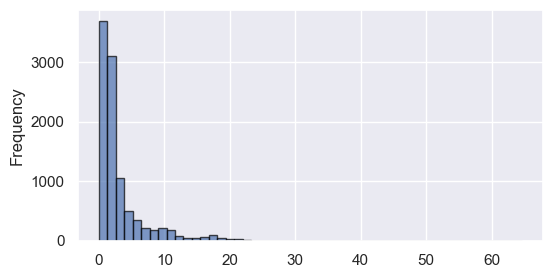

In [55]:
# Plot a histogram of trip distances
df['trip_distance'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7, figsize=(6, 3));

In [56]:
# Define short (0-2), medium (2-10), and long (10+) trips
def categorize_trip_distance(distance):
    if distance <= 2:
        return 'short'
    elif distance <= 10:
        return 'medium'
    else:
        return 'long'
    
# Apply the categorization function to create a new column
df['trip_category'] = df['trip_distance'].apply(categorize_trip_distance)
df

,trip_distance,passenger_count,trip_category
0,1.63,1,short
1,0.46,1,short
2,0.87,1,short
3,2.13,1,medium
4,1.40,1,short
...,...,...,...
9994,2.70,1,medium
9995,4.50,1,medium
9996,5.59,1,medium
9997,1.54,6,short


In [57]:
# Compute the number of trips with only one passenger in each category
mask_one_passenger = df['passenger_count'] == 1
trip_counts = df[mask_one_passenger]['trip_category'].value_counts()
print("\nNumber of trips with only one passenger in each category:")
print(trip_counts)


Number of trips with only one passenger in each category:
trip_category
short     4333
medium    2387
long       487
Name: count, dtype: int64


## EXERCISE 13. Interpolation

In [72]:
s = pd.read_csv('data/nyc-temps.txt').squeeze()
df = pd.DataFrame({'temp': s, 
                'hour': [0,3,6,9,12,15,18,21] * 91})

df

,temp,hour
0,-1,0
1,-1,3
2,-1,6
3,-1,9
4,-1,12
...,...,...
723,2,9
724,2,12
725,2,15
726,2,18


In [73]:
df.isnull().sum()

temp    0
hour    0
dtype: int64

### 13.1. Value Interpolation

In [67]:
print(sorted(df['temp'].unique().tolist()))

[-14, -13, -12, -11, -10, -9, -8, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 8, 9, 12]


In [60]:
# 3. Calculate the mean and median values
mean_temp = df['temp'].mean()
median_temp = df['temp'].median()
print(f"Mean temperature: {mean_temp:.2f}")
print(f"Median temperature: {median_temp:.2f}")

Mean temperature: -1.05
Median temperature: 0.00


In [70]:
# Compute median manually
sorted_temps = sorted(df['temp'])
n = len(sorted_temps)
print(f"Number of temperature readings: {n}")
sorted_temps[n // 2 - 3 : n // 2 + 3]  # Show a few values around the median

Number of temperature readings: 728


[0, 0, 0, 0, 0, 0]

In [75]:
# 4 Set all values from 3:00 and 6:00 a.m. to NaN
df.loc[df['hour'].isin([3, 6]), 'temp'] = np.nan

In [78]:
df.loc[df['hour'].isin([3, 6]), 'temp'].shape, df['temp'].isnull().sum()

((182,), np.int64(182))

In [79]:
# 5 Interpolate the values with the interpolate method
df['temp'] = df['temp'].interpolate(method='linear')

In [80]:
# 5 Re-compute the mean and median values after interpolation
mean_temp_after = df['temp'].mean()
median_temp_after = df['temp'].median()
print(f"Mean temperature after interpolation: {mean_temp_after:.2f}")
print(f"Median temperature after interpolation: {median_temp_after:.2f}")

Mean temperature after interpolation: -1.05
Median temperature after interpolation: 0.00


### 13.2. Using `method='nearest'` for interpolation

In [81]:
# Set all values from 3:00 and 6:00 a.m. to NaN
df.loc[df['hour'].isin([3, 6]), 'temp'] = np.nan

# Interpolate the values with the interpolate method nearest
df['temp'] = df['temp'].interpolate(method='nearest')

# Re-compute the mean and median values after interpolation
mean_temp_after_nearest = df['temp'].mean()
median_temp_after_nearest = df['temp'].median()
print(f"Mean temperature after nearest interpolation: {mean_temp_after_nearest:.2f}")
print(f"Median temperature after nearest interpolation: {median_temp_after_nearest:.2f}")

Mean temperature after nearest interpolation: -1.05
Median temperature after nearest interpolation: 0.00


### 13.3. Values `-1` and below are missing

In [82]:
s = pd.read_csv('data/nyc-temps.txt').squeeze()
df = pd.DataFrame({'temp': s, 
                'hour': [0,3,6,9,12,15,18,21] * 91})

df

,temp,hour
0,-1,0
1,-1,3
2,-1,6
3,-1,9
4,-1,12
...,...,...
723,2,9
724,2,12
725,2,15
726,2,18


In [84]:
# Remove -1 and values below -1 - set them to NaN
df.loc[df['temp'] <= -1, 'temp'] = np.nan

df.shape, df['temp'].isnull().sum()


((728, 2), np.int64(351))

In [85]:
# Interpolate the values with the interpolate method linear
df['temp'] = df['temp'].interpolate(method='linear')

# Compute the mean and median values after interpolation
mean_temp_after = df['temp'].mean()
median_temp_after = df['temp'].median() 
print(f"Mean temperature after interpolation: {mean_temp_after:.2f}")
print(f"Median temperature after interpolation: {median_temp_after:.2f}")

Mean temperature after interpolation: 2.02
Median temperature after interpolation: 1.00


### 13.4. Replace `NaN` values with the column’s mean

In [88]:
s = pd.read_csv('data/nyc-temps.txt').squeeze()
df = pd.DataFrame({'temp': s, 
                'hour': [0,3,6,9,12,15,18,21] * 91})

# Compute the mean before any modifications
mean_temp_before = df['temp'].mean()

# Remove -1 and values below -1 - set them to NaN
df.loc[df['temp'] <= -1, 'temp'] = np.nan

# Replace NaN values with the mean of the column
df['temp'] = df['temp'].fillna(mean_temp_before)

# Compute the mean and median values after replacing NaN
mean_temp_after_fillna = df['temp'].mean()
median_temp_after_fillna = df['temp'].median()
print(f"Mean temperature after fillna: {mean_temp_after_fillna:.2f}")
print(f"Median temperature after fillna: {median_temp_after_fillna:.2f}")

Mean temperature after fillna: 0.92
Median temperature after fillna: 0.00


## EXERCISE 14. Selective updating

### 14.1. Update the values in the temp column so that any value less than 0 is set to 0

In [89]:
s = pd.read_csv('data/nyc-temps.txt').squeeze()
df = pd.DataFrame({'temp': s, 
                'hour': [0,3,6,9,12,15,18,21] * 91})

df

,temp,hour
0,-1,0
1,-1,3
2,-1,6
3,-1,9
4,-1,12
...,...,...
723,2,9
724,2,12
725,2,15
726,2,18


In [90]:
# Set the values less than 0 to 0
mask_negative = df['temp'] < 0
df.loc[mask_negative, 'temp'] = 0

# Compute the mean and median values after setting negative values to 0
mean_temp_after_set_zero = df['temp'].mean()
median_temp_after_set_zero = df['temp'].median()
print(f"Mean temperature after setting negatives to 0: {mean_temp_after_set_zero:.2f}")
print(f"Median temperature after setting negatives to 0: {median_temp_after_set_zero:.2f}")

Mean temperature after setting negatives to 0: 1.43
Median temperature after setting negatives to 0: 0.00


### 14.2-4 Beyond the exercise

In [96]:
s = pd.read_csv('data/nyc-temps.txt').squeeze()
df = pd.DataFrame({'temp': s, 
                'hour': [0,3,6,9,12,15,18,21] * 91})

df

,temp,hour
0,-1,0
1,-1,3
2,-1,6
3,-1,9
4,-1,12
...,...,...
723,2,9
724,2,12
725,2,15
726,2,18


In [94]:
df['temp'].dtype

dtype('int64')

In [98]:
# Set all the odd temperatures to the mean of all the temperatures
mean_temp = df['temp'].mean()
mask_odd = df['temp'] % 2 != 0
df.loc[mask_odd, 'temp'] = np.int64(mean_temp)

# Set the even temperatures at hours 9 and 18 to 3
mask_even_hours = (df['temp'] % 2 == 0)
mask_between_hours = df['hour'].isin([9, 18])
df.loc[mask_even_hours & mask_between_hours, 'temp'] = np.int64(3)

In [99]:
s = pd.read_csv('data/nyc-temps.txt').squeeze()
df = pd.DataFrame({'temp': s, 
                'hour': [0,3,6,9,12,15,18,21] * 91})

In [100]:
# If the hour is odd, set the temperature to 5
mask_odd_hour = df['hour'] % 2 != 0
df.loc[mask_odd_hour, 'temp'] = np.int64(5)

In [101]:
df

,temp,hour
0,-1,0
1,5,3
2,-1,6
3,5,9
4,-1,12
...,...,...
723,5,9
724,2,12
725,5,15
726,2,18
